# GRIP : The Sparks Foundation
## Data Science and Business Analytics Intern(Sep-2021)
## Author : Rudresh Patidar
## Task 2 : From the given 'Iris' dataset, predicting the optimum number of clusters and representing it visually.

In [40]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn import datasets

In [41]:
ir = datasets.load_iris()
iris = pd.DataFrame(ir.data, columns = ir.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Finding the optimum of clusters for K Means.

1. We are going to use Elbow Method for finding the optimum number of  Cluster for K Means.
2. For this we need to plot the inertia graph.
3. Inertia tells how far away the points within a cluster are. Therefore, a small of inertia is aimed for. The range of inertia's value stars from zero and goes up.   



### Calculating Inertia

In [42]:
x = iris.iloc[:,[0, 1, 2, 3]].values

from sklearn.cluster import KMeans
WCSS = [] #within cluster sum of squares

for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    WCSS.append(km.inertia_)
    

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Plotting Inertia Graph

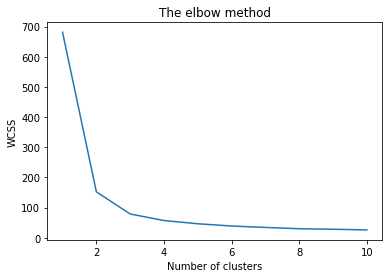

In [43]:
plt.plot(range(1, 11), WCSS)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

 1. The optimum clusters is where the elbow occurs.
 2. After 3 the slope of graph decreases by small amounts, suggesting that algorithm has almost converged.
 3. We can say that 3 clusters are optimum.

### Creating the kmeans classifier

In [44]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### plotting the clusters

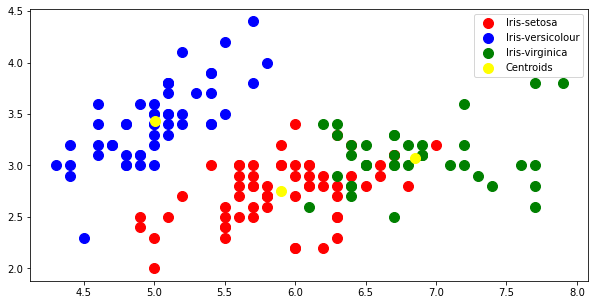

In [45]:
# on the first two columns
plt.figure(figsize=(10,5))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#centroid of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
